# Part 1
### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


# Part 2
### Sequencing - Turning sentences into data
creating sequences of numbers from your sentences, and using tools to process them to make them ready for teaching neural networks.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you thik my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\n Word index: ", word_index)
print("\n Sequences: ", sequences)
print("\n Padded: sequences: \n", padded)

# Try with words that the tokenizer wasn't fit to
test_data = [
    'I really love my dog',
    'My dog love my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\n Test sequences: ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\n Padded test sequence: \n", padded)


 Word index:  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'thik': 9, 'is': 10, 'amazing': 11}

 Sequences:  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

 Padded: sequences: 
 [[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]

 Test sequences:  [[5, 1, 3, 2, 4], [2, 4, 3, 2, 1]]

 Padded test sequence: 
 [[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 3 2 1]]


# Part 3  (Sentiment Analysis)
### Training a model to recognize sentiment in text

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x   # specify TensorFlow version 2.x. This is useful when you have multiple versions of TensorFlow installed on your system.
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


# In Unix/Linux shell command:
# "wget": used for downloading files from the internet
# "--no-check-certificate" tells "wget" to ignore SSL certificate verification
# "-O /tmp/sarcasm.json" specifies the output file path where the downloaded file will be saved. In this case, it will be saved as /tmp/sarcasm.json

--2023-08-03 16:01:28--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 172.253.117.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2023-08-03 16:01:29 (41.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", "r") as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
# spliting the dataset into train and test set
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Tokenizer used to convert text sentences into sequences of integers

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)    # Createing a Tokenizer object with a specified vocabulary size and an out-of-vocabulary token.
tokenizer.fit_on_texts(training_sentences)    # tokenizes the training sentences and creates a word-to-index mapping.

word_index = tokenizer.word_index     # Geting the word-to-index mapping (dictionary)

training_sequences = tokenizer.texts_to_sequences(training_sentences)   # Each word in the sentences is replaced by its corresponding index in the word-to-index mapping.
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  # ensure they all have the same length.

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)   # Tokenizer uses the word-to-index mapping learned from the training sentences
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)   # match the same length as the training sequences.

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),    # # convert integer-encoded words (indices) into dense vectors (embeddings). "vocab_size" -> number of unique words in the dataset. 'input_length' specifies the length of the input sequences (padded sequences in this case).
    tf.keras.layers.GlobalAveragePooling1D(),     # # reduces the dimensionality of the embeddings to a fixed-size representation.
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 8s - loss: 0.6682 - accuracy: 0.5751 - val_loss: 0.6037 - val_accuracy: 0.6131 - 8s/epoch - 13ms/step
Epoch 2/30
625/625 - 5s - loss: 0.4455 - accuracy: 0.8237 - val_loss: 0.3967 - val_accuracy: 0.8240 - 5s/epoch - 9ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3140 - accuracy: 0.8747 - val_loss: 0.3577 - val_accuracy: 0.8502 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2619 - accuracy: 0.8980 - val_loss: 0.3440 - val_accuracy: 0.8547 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2261 - accuracy: 0.9128 - val_loss: 0.3435 - val_accuracy: 0.8560 - 4s/epoch - 6ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1985 - accuracy: 0.9230 - val_loss: 0.3518 - val_accuracy: 0.8550 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1756 - accuracy: 0.9334 - val_loss: 0.3705 - val_accuracy: 0.8541 - 2s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1578 - accuracy: 0.9422 - val_loss: 0.3816 - val_accuracy: 0.8512 - 3s/epoch - 4ms/step
Epoch 9/30
625/625 - 4s

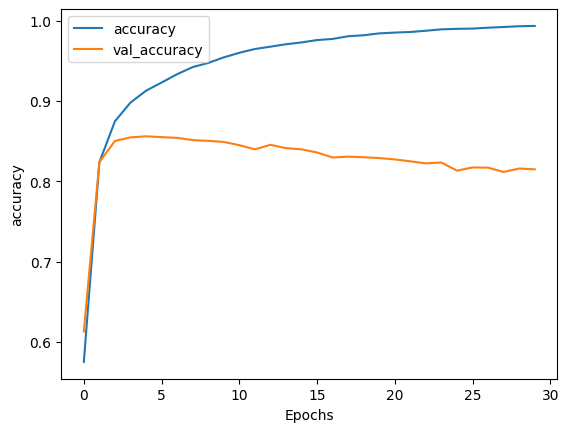

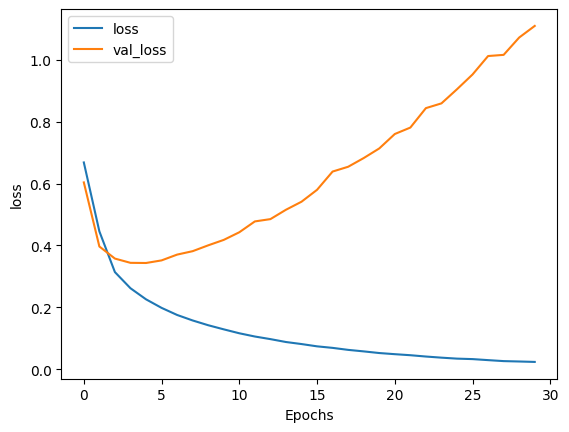

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    # Create a dictionary 'reverse_word_index' by swapping the key-value pairs of 'word_index'. eg {'love': 1,} to {1:'love'}

def decode_sentence(text):      #  takes a list of integer indices (text) as input and returns a string of words corresponding to those indices.
    return ' '.join([reverse_word_index.get(i, '?') for i in text])   # iterating each index in the text list, using the "reverse_word_index" dictionary to map the index to the corresponding word. If an index is not found in the "reverse_word_index" dictionary, it uses '?' as a placeholder.

print(decode_sentence(training_padded[0]))  # Decode and print the first sentence in 'training_padded' list
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]   # Get the first layer (embedding layer) of the 'model'
weights = e.get_weights()[0]    # Get the weights of the embedding layer
print(weights.shape)   # Print the shape of the weights

(10000, 16)


**note:**  `shape: (vocab_size, embedding_dim)`

Now, *Saving the word embeddings* learned from the embedding layer into two separate TSV (Tab-Separated Values) files: 'vecs.tsv' and 'meta.tsv'.

These files can later be used for visualization in tools like TensorBoard's Embedding Projector.

In [ ]:
import io

# Open 'vecs.tsv' and 'meta.tsv' files for writing word embeddings and their corresponding words
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Loop through each word in the vocabulary and its corresponding index (from 1 to vocab_size-1)
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]    # Get the word corresponding to the current word_num from the reverse_word_index dictionary
  embeddings = weights[word_num]    # Get the embeddings (weights) for the current word_num from the 'weights' array
  out_m.write(word + "\n")    # Write the word to 'meta.tsv' file (one word per line)
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")   # Write the embeddings to 'vecs.tsv' file (tab-separated values) and The embeddings array is converted to a string with tab-separated values (tsv)

  # Close the output files after writing
out_v.close()
out_m.close()

In [ ]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# List of sentences to process
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentences)   # Convert sentences to sequences of integer indices using the tokenizer
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)   # Pad the sequences to make them of equal length (if needed) for input to the model
print(model.predict(padded))    # Use the pre-trained model to predict the output for the processed sentences. It returns the predicted output for each sentence

835/835 [==============================] - 1s 1ms/step
[[1.7018803e-07]
 [6.0337357e-09]
 [9.9938089e-01]
 ...
 [7.8510446e-03]
 [1.7138891e-03]
 [1.4166061e-07]]


# Part 4, 5, 6
### ML with Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM) and Training an AI to create poetry

You saw how to tokenize and then sequence text, preparing it to train neural networks. You saw how sentiment in text can be represented with embeddings, and how the semantics of text over long stretches might be learned using recurrent neural networks and LSTMs.

*In this video we’ll put all of that together into a fun scenario -- creating a model and training it on the lyrics to traditional Irish songs.*

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# wget command-line tool download a file from the specified URL and save it to the local filesystem
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-08-04 07:42:54--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-08-04 07:42:55 (127 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

`[:, :-1]:` This is the slicing operation. The `:` inside the brackets indicates that we want to select all rows of the 2D array. The `:-1` indicates that we want to select all columns except the last one.

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]		# Convert the sentence into a sequence of integer indices

	# Generate n-gram sequences and append each n-gram sequence to the 'input_sequences' list
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)		# Convert the label array into one-hot encoded categorical data

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 27s 61ms/step - loss: 6.7620 - accuracy: 0.0651
Epoch 2/100
377/377 [==============================] - 23s 62ms/step - loss: 6.2383 - accuracy: 0.0759
Epoch 3/100
377/377 [==============================] - 20s 54ms/step - loss: 5.9763 - accuracy: 0.0845
Epoch 4/100
377/377 [==============================] - 19s 51ms/step - loss: 5.6773 - accuracy: 0.0969
Epoch 5/100
377/377 [==============================] - 20s 53ms/step - loss: 5.3378 - accuracy: 0.1164
Epoch 6/100
377/377 [==============================] - 20s 53ms/step - loss: 4.9687 - accuracy: 0.1331
Epoch 7/100
377/377 [==============================] - 19s 51ms/step - loss: 4.5802 - accuracy: 0.1593
Epoch 8/100
377/377 [==============================] - 20s 54ms/step - loss: 4.2141 - accuracy: 0.1847
Epoch 9/100
377/377 [==============================] - 21s 55ms/step - loss: 3.8630 - accuracy: 0.2202
Epoch 10/100
377/377 [==============================] - 20s 53ms/step - l

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

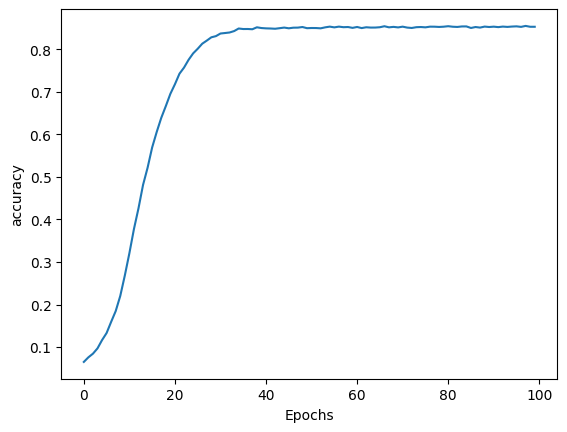

In [ ]:
plot_graphs(history, 'accuracy')

It takes a seed text, generates the next words, and continues the prediction until next_words number of words are generated.

It uses the tokenizer to convert text into integer sequences and back into text, while the model predicts the next word at each step.

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]			# Convert the sentence into a sequence of integer indices
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')		# Pad the token_list to match the model's input shape
	predicted = np.argmax(model.predict(token_list), axis=-1)		# Predict the next word using the trained mode

	# Convert the predicted index back to the corresponding word
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break

	# Append the predicted word to the seed_text to generate the next step
	seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 23ms/step
I've got a bad feeling about this call every johnny dhu i make you love by the green light they can see me and never say me had to smother stole my rapier o stole a had fair may man it lrelands sad shall room had came and rest frightened to tore banbridge erin take them home all a died of time went away oer the foam turn a world a might true has seen them your fathers bride are springtime of spancil hill and drowsily hats say an stone leaving kilrain rakes ra bridge banbridge toast linnets sea and tree by the tree of mallow other
